In [8]:
import pandas as pd
from sklearn import linear_model, tree, neural_network, preprocessing
import numpy as np
import random
import math
from datetime import datetime
from matplotlib import pyplot as plt
import copy

In [9]:
ord_enc = preprocessing.OrdinalEncoder()
#Import the data set and remove the rows with missing values
metro_data = pd.read_csv('datasets/Metro_Interstate_Traffic_Volume.csv')

#transform the categorical holiday variable into a encoded variable.
metro_data["holiday"] = ord_enc.fit_transform(metro_data[["holiday"]])
# print(metro_data["holiday"].value_counts())


metro_data["weather_main"] = ord_enc.fit_transform(metro_data[["weather_main"]])
# print(metro_data["weather_main"].value_counts())

metro_data["weather_description"] = ord_enc.fit_transform(metro_data[["weather_description"]])
# print(metro_data["weather_description"].value_counts())

# metro_data["date_time"] = ord_enc.fit_transform()
# print(metro_data["weather_description"].value_counts())
metro_data['time'] = pd.to_datetime(metro_data['date_time']).dt.time
metro_data['time'] = ord_enc.fit_transform(metro_data[['time']])
# print(metro_data['time'].value_counts())
# metro_data[]
metro_data['day'] = pd.to_datetime(metro_data['date_time']).dt.day
metro_data['month'] = pd.to_datetime(metro_data['date_time']).dt.month
metro_data['year'] = pd.to_datetime(metro_data['date_time']).dt.year
metro_data.drop('date_time', axis=1)

# print(metro_data)
metro_data = metro_data[['traffic_volume',
                        'holiday',
                        'temp',
                        'rain_1h',
                        'snow_1h',
                        'clouds_all',
                        'weather_main',
                        'weather_description',
                        'day',
                        'month',
                        'year',
                        'time']]
# print(metro_data)
npdata = metro_data.to_numpy()
print(npdata)

[[5545.      7.    288.28 ...   10.   2012.      9.  ]
 [4516.      7.    289.36 ...   10.   2012.     10.  ]
 [4767.      7.    289.58 ...   10.   2012.     11.  ]
 ...
 [2159.      7.    282.73 ...    9.   2018.     21.  ]
 [1450.      7.    282.09 ...    9.   2018.     22.  ]
 [ 954.      7.    282.12 ...    9.   2018.     23.  ]]


In [10]:
random.seed(50)
test_indices = np.unique(np.array([random.randint(0,npdata.shape[0]-1) for k in range(0,math.ceil(0.2*npdata.shape[0]))]))
# print(test_indices)
test_data = npdata[test_indices, :]
print(test_data.shape[0])
test_X = test_data[:,1:]
real_mpg = test_data[:, 0]

mu = 0
# displacement = 1st column, hp = 2nd column, weight = 3rd column, acceleration = 4th column
features = [[2], [3], [1], [2,3], [2,1], [3,4], [2,3,1]] 
input_variances = np.arange(0,200,5)
iterations = 100

results = np.zeros([iterations, test_X.shape[0]])
output_variances = np.zeros(input_variances.size)
plot_matrix = np.zeros([len(features), input_variances.size])

for j in range(0, len(features)):
    k = 0
    for sig in input_variances:
        rng = np.random.default_rng(12345)
        for i in range(0, iterations):
            data = copy.deepcopy(npdata)
            training_data = np.delete(data, test_indices, axis=0)
            rows = training_data.shape[0]
            noise_indices = rng.choice(rows-1, math.ceil(0.1*rows), replace=False)
            for el in features[j]:
                noises = rng.normal(mu, sig, noise_indices.shape)
                training_data[noise_indices, el] += noises
            training_X = training_data[:, 1:]
            training_y = training_data[:, 0]
            ######################################################### LINEAR REGRESSION
            # clf = linear_model.LinearRegression()
            ######################################################### DECISION TREE
            clf = tree.DecisionTreeRegressor(random_state=42)
            ######################################################### NEURAL NET
            # clf = neural_network.MLPRegressor(random_state=42, max_iter=100)
            #########################################################
            clf = clf.fit(training_X, training_y)
            prediction_mpg = clf.predict(test_X)
            results[i] = prediction_mpg
        variances = np.array([np.var(results[:, k]) for k in range(0, results.shape[1])])
        mean_output_variance = np.mean(variances)
        print(mean_output_variance)
        output_variances[k] = mean_output_variance
        plot_matrix[j] = output_variances
        k += 1
# print(output_variances)
print("done")

8733
0.0
543880.4752935531
570886.4910947441
581117.762199416
584872.7770589946
583375.9718682354
586312.2035941487
591539.4992877933
591145.3790167983
591929.7250691173
593008.4809464903
590368.6463896486
589440.0308170503
586888.2730443949
590125.1477857552
590225.2188083706
589159.1092083704
588227.1746856064
588466.1910334937
589314.8872441429
591049.969639803
589215.8040779458
586912.2061720485
588666.746111634
589604.1728932096
591350.4822542082
590470.1797137982
590883.7498788389
590272.1778212872
590568.4933693347
592408.2561398832
591661.5438168327
590337.405688927
592173.139071602
592946.7346890758
593362.3627358411
592124.5579011793
593271.2627118402
593904.3778472119
592141.1821358067
0.0
329525.905999897
336164.01773446694
328427.28725102486
325039.6739743731
323597.0437953739
324367.53259760677
323574.9255554105
322885.7986077293
322421.14112569566
322263.8254753693
321892.86274326115
321804.9425599336
320577.7594893508
320919.7023164548
321193.33783234854
321710.57235831

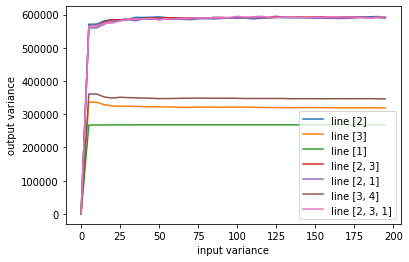

In [11]:
now = datetime.now()
timestamp = datetime.timestamp(now)
#Plot the outcomes
t=0
plot_matrix[:,1] = plot_matrix[:,2]
for arr in plot_matrix:
    plt.plot(input_variances, arr, label="line " + str(features[t]))
    t+=1
plt.xlabel('input variance')
plt.ylabel('output variance')
plt.legend()
plt.savefig('metro'+ str(timestamp) + '.png')
plt.show()


In [12]:
# random.seed(50)
# test_indices = np.unique(np.array([random.randint(0,npdata.shape[0]-1) for k in range(0,1000)]))
# # print(test_indices)
# test_data = npdata[test_indices, :]
# test_X = test_data[:,1:]
# real_mpg = test_data[:, 0]
# training_data = np.delete(npdata, test_indices, axis=0)
# training_X = training_data[:, 1:]
# training_y = training_data[:, 0]
# # clf = linear_model.LinearRegression()
# # clf = tree.DecisionTreeRegressor(random_state=42)
# clf = neural_network.MLPRegressor(random_state=42, max_iter=500)
# clf = clf.fit(training_X, training_y)
# prediction_mpg = clf.predict(test_X)
# print(prediction_mpg-real_mpg)

